In [1]:
import numpy as np
import astroplan
from astroplan.plots import plot_sky
from astroplan import plots, Observer, FixedTarget
from astropy.coordinates import SkyCoord
from astropy.time import Time
import astropy
import astropy.units as u
from matplotlib import pyplot as plt
from astropy.table import Table
from matplotlib import cycler
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, get_moon
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
astropy.__version__

'6.0.1'

In [4]:
#astroplan.download_IERS_A()
#astropy.utils.iers.IERS_A_URL = 'http://toshi.nofs.navy.mil/ser7/finals2000A.all'
astroplan.download_IERS_A()

In [5]:
custom_cycler=[]
colors=[]
colors = [icolor['color'] for icolor in plt.rcParams['axes.prop_cycle'] ]
custom_cycler = cycler(linestyle=['-', '--'])*cycler(color=colors)

In [6]:
observer = astroplan.Observer.at_site('lick')

In [7]:
today = Time('2024-07-29 04:00:00', scale='utc')

In [8]:
pre_twi12deg = observer.sun_set_time(today, horizon=-12*u.degree)
print('12 deg env twilight', pre_twi12deg.iso)
pre_twi15deg = observer.sun_set_time(today, horizon=-15*u.degree)
print('15 deg env twilight', pre_twi15deg.iso)
pre_twi18deg = observer.twilight_evening_astronomical(today)
print('18 deg eve twilight', pre_twi18deg.iso)

twi18deg = observer.twilight_morning_astronomical(today)
print('18 deg morn twilight', twi18deg.iso)
twi15deg = observer.sun_rise_time(today, horizon=-15*u.degree)
print('15 deg morn twilight', twi15deg.iso)
twi12deg = observer.twilight_morning_nautical(today)
print('12 deg morn twilight', twi12deg.iso)

handoff = Time('2024-07-29 04:35:00', scale='utc') #hand-off to us

12 deg env twilight 2024-07-29 04:21:56.955
15 deg env twilight 2024-07-29 04:40:44.953
18 deg eve twilight 2024-07-29 05:00:30.386
18 deg morn twilight 2024-07-29 11:25:54.134
15 deg morn twilight 2024-07-29 11:45:39.159
12 deg morn twilight 2024-07-29 12:04:27.610


In [9]:
gd71           =astroplan.FixedTarget(coord=SkyCoord('05:52:27.51', '+15:53:16.6', unit=(u.hourangle, u.degree)),
                                      name='gd71')
BD174708       =astroplan.FixedTarget(coord=SkyCoord('22:11:31.37',  '+18:05:34.2',unit=(u.hourangle, u.degree)),
                                      name='BD174708')#10 s	R~9.2	red standard
HD19445        =astroplan.FixedTarget(coord=SkyCoord('03:08:25.86',  '+26:20:05.7',unit=(u.hourangle, u.degree)),
                                      name='HD19445')#10 s	R~7.8	red standard
HD84937        =astroplan.FixedTarget(coord=SkyCoord('09:48:56.09',  '+13:44:39.3',unit=(u.hourangle, u.degree)),
                                      name='HD84937')#10 s	V~8.3	red standard
BD262606       =astroplan.FixedTarget(coord=SkyCoord('14:49:02.35',  '+25:42:09.1',unit=(u.hourangle, u.degree)),
                                      name='BD262606')#20 s	V~9.7	red standard
Feige66       = astroplan.FixedTarget(coord=SkyCoord('12:37:23.6',  '+25:04:00',unit=(u.hourangle, u.degree)),
                                      name='Feige66')#	V~10.5	(sdO)03:55:21.7','+09:47:18
#HZ4           = astroplan.FixedTarget(coord=SkyCoord('',unit=(u.hourangle, u.degree)),
#                                      name='HZ4')#	DA4	14.52	3850	8850	1,3
PG0205134     = astroplan.FixedTarget(coord=SkyCoord('02:08:03.44', '+13:36:30.9',unit=(u.hourangle, u.degree)),
                                      name='PG0205134')#	sdOB	14.87	3200	8100	5

Feige11       = astroplan.FixedTarget(coord=SkyCoord('01:04:21.6', '+04:13:37',unit=(u.hourangle, u.degree)),
                                      name='Feige11')#	sdB	12.07	3850	8850	3

Hiltner600    = astroplan.FixedTarget(coord=SkyCoord('06:45:13.40', '+02:08:14.1',unit=(u.hourangle, u.degree)),
                                      name='Hiltner600')#	B1V	10.45	3200	10300	5, 6, 2
LTT9239         = astroplan.FixedTarget(coord=SkyCoord('22 52 40.88', '-20 35 26.3', unit=(u.hourangle, u.degree)),
                                      name='LTT9239')
LTT1020    = astroplan.FixedTarget(coord=SkyCoord('01:54:49.7', '-27:28:29', unit=(u.hourangle, u.degree)),
                                      name='LTT1020')#V~11.522 
LTT6248    = astroplan.FixedTarget(coord=SkyCoord('15:38:59.8', '-28:35:34', unit=(u.hourangle, u.degree)),
                                      name='LTT6248')#V~11.797


Feige34        =astroplan.FixedTarget(coord=SkyCoord('10:39:36.74',  '+43:06:09.3',unit=(u.hourangle, u.degree)),
                                      name='Feige34')#60 s	V~11.3	blue standard (DO)
BD284211       =astroplan.FixedTarget(coord=SkyCoord('21:51:11.02',  '+28:51:50.4',unit=(u.hourangle, u.degree)),
                                      name='BD284211')#30 s	R~10.7	blue standard  (sdOp)
Feige110       =astroplan.FixedTarget(coord=SkyCoord('23:19:58.39',  '-05:09:55.8',unit=(u.hourangle, u.degree)),
                                      name='Feige110')#60 s	V~11.83	(DOp)
HZ44           =astroplan.FixedTarget(coord=SkyCoord('13:23:35.26',  '+36:07:59.5',unit=(u.hourangle, u.degree)),
                                      name='HZ44')#60 s	V~11.7	blue standard

BD64106        =astroplan.FixedTarget(coord=SkyCoord('00:57:36.70',  '+64:51:34.92',unit=(u.hourangle, u.degree)),
                                      name='BD64106')#V~10.23, polarized
HD236633       =astroplan.FixedTarget(coord=SkyCoord('01:09:12.34',  '+60:37:40.92',unit=(u.hourangle, u.degree)),
                                      name='HD236633')#V~9.18, polarized

G191B2B        =astroplan.FixedTarget(coord=SkyCoord('05:05:30.60',  '+52:49:54.0',unit=(u.hourangle, u.degree)),
                                      name='G191B2B')#60 s	R~11.9	blue standard (DA0)
GD319          =astroplan.FixedTarget(coord=SkyCoord('12:50:05.00',  '+55:06:00.0',unit=(u.hourangle, u.degree)),
                                      name='GD319')#V~12.32, polarized
BD33d2642      =astroplan.FixedTarget(coord=SkyCoord('15:51:59.86',  '+32:56:54.8',unit=(u.hourangle, u.degree)),
                                      name='BD33d2642')#30 s	V~10.81	(B2IV)

In [10]:
# stds = [gd71, BD284211, BD174708, HD19445, G191B2B, HD84937, Feige34, HZ44, BD262606, BD33d2642, 
#         Feige110, Feige66,PG0205134, Feige11, Hiltner600, LTT9239,LTT1020,LTT6248,Feige34]

# stds = [BD64106,HD236633]

# stds = [Feige34,BD284211,Feige110,G191B2B,HZ44,BD33d2642] # Kast red standards

stds = [HD19445,HD84937,BD262606,BD174708] # Kast blue standards

### Choose Standards for the night

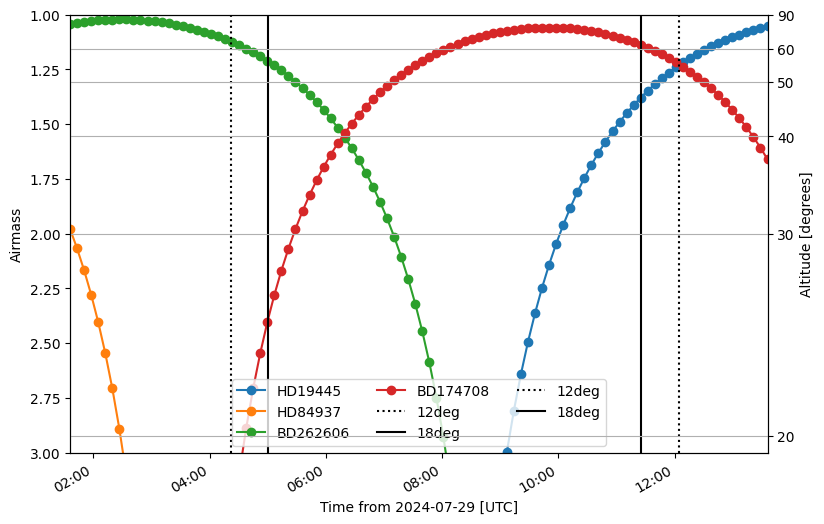

In [11]:
from astropy.utils.iers import conf
conf.auto_max_age = None
# time = today+np.linspace(0, 0.32, 100)
time = today+np.linspace(-0.1, 0.4, 100)
#plt.figure(figsize=(9,6))
fig = plt.figure(figsize=(9,6))
fig.subplotpars.update(bottom=0.15)
ax = fig.add_subplot(111)

for istd, istyle in zip(stds, custom_cycler):
    plots.plot_airmass(istd, observer, time, style_kwargs=istyle,altitude_yaxis=True,ax=ax)

ax.axvline(pre_twi12deg.plot_date, linestyle=':', label='12deg', color='k')
ax.axvline(pre_twi18deg.plot_date, label='18deg', color='k')

ax.axvline(twi12deg.plot_date, linestyle=':', label='12deg', color='k')
ax.axvline(twi18deg.plot_date, label='18deg', color='k')

# plt.axvline(handoff.plot_date, label='handoff', color='k')
ax.legend(ncol=3, loc='lower center')
plt.grid()


In [12]:
chosen_stds = [HZ44,
               BD284211,
               BD262606,
               BD174708
               ]

In [13]:
sn2022xus = astroplan.FixedTarget(coord=SkyCoord('06:54:05.13', '+08:34:13.5', unit=(u.hourangle, u.degree)),
                                   name='2022xus')
sn2022crv = astroplan.FixedTarget(coord=SkyCoord('09:54:25.82', '-25:42:10.5', unit=(u.hourangle, u.degree)),
                                   name='2022crv')
sn2022jox = astroplan.FixedTarget(coord=SkyCoord('09:57:44.49', '-28:30:56.5', unit=(u.hourangle, u.degree)),
                                   name='2022jox')
sn2022ewj = astroplan.FixedTarget(coord=SkyCoord('10:46:34.61', '+13:45:16.9', unit=(u.hourangle, u.degree)),
                                   name='2022ewj')
sn2022mma = astroplan.FixedTarget(coord=SkyCoord('14:39:01.50', '+15:59:11.8', unit=(u.hourangle, u.degree)),
                                   name='2022mma')
sn2022abq = astroplan.FixedTarget(coord=SkyCoord('13:22:56.79', '+28:19:09.6', unit=(u.hourangle, u.degree)),
                                   name='2022abq')
sn2022frq = astroplan.FixedTarget(coord=SkyCoord('13:27:56.91', '-13:24:59.2', unit=(u.hourangle, u.degree)),
                                   name='2022frq')
sn2022kad = astroplan.FixedTarget(coord=SkyCoord('14:58:43.32', '+11:37:50.9', unit=(u.hourangle, u.degree)),
                                   name='2022kad')
sn2022fuc = astroplan.FixedTarget(coord=SkyCoord('12:34:34.25', '+63:31:06.4', unit=(u.hourangle, u.degree)),
                                   name='2022fuc')
sn2023bee = astroplan.FixedTarget(coord=SkyCoord('08:56:11.63', '-03:19:32.0', unit=(u.hourangle, u.degree)),
                                   name='2023bee')
sn2023axu = astroplan.FixedTarget(coord=SkyCoord('06:45:55.32', '-18:13:53.5', unit=(u.hourangle, u.degree)),
                                   name='2023axu')    

sn2021ahpl =  astroplan.FixedTarget(coord=SkyCoord('15:15:57.94', '-19:17:32.0', unit=(u.hourangle, u.degree)),
                                   name='2021ahpl') 
sn2021yja = astroplan.FixedTarget(coord=SkyCoord('03:24:21.17', '-21:33:56.2', unit=(u.hourangle, u.degree)),
                                   name='2021yja')

sn2022wsp = astroplan.FixedTarget(coord=SkyCoord('23:00:03.56', '+15:58:43.9', unit=(u.hourangle, u.degree)),
                                   name='2022wsp') 
sn2022xkq = astroplan.FixedTarget(coord=SkyCoord('05:05:23.71', '-11:52:56.1', unit=(u.hourangle, u.degree)),
                                   name='2022xkq') 
sn2022aaiq = astroplan.FixedTarget(coord=SkyCoord('14:26:32.03', '+56:35:03.2', unit=(u.hourangle, u.degree)),
                                   name='2022aaiq') 
sn2023cpt = astroplan.FixedTarget(coord=SkyCoord('15:21:33.36', '-13:05:21.7', unit=(u.hourangle, u.degree)),
                                   name='2023cpt') 
sn2022esa = astroplan.FixedTarget(coord=SkyCoord('16:53:57.60', '-09:42:10.1', unit=(u.hourangle, u.degree)),
                                   name='2022esa') 
sn2022pul = astroplan.FixedTarget(coord=SkyCoord('12:26:48.86', '+08:26:55.3', unit=(u.hourangle, u.degree)),
                                   name='2022pul') 
sn2022qzr = astroplan.FixedTarget(coord=SkyCoord('00:09:55.01', '-05:01:16.1', unit=(u.hourangle, u.degree)),
                                   name='2022qzr') 
sn2023axu = astroplan.FixedTarget(coord=SkyCoord('06:45:55.32', '-18:13:53.5', unit=(u.hourangle, u.degree)),
                                   name='2023axu') 
sn2023gft = astroplan.FixedTarget(coord=SkyCoord('21:26:01.32', '-03:47:53.6', unit=(u.hourangle, u.degree)),
                                   name='2023gft') 
sn2023ktw = astroplan.FixedTarget(coord=SkyCoord('17:27:29.91', '+34:17:53.03', unit=(u.hourangle, u.degree)),
                                   name='2023ktw') 
sn2021qqu = astroplan.FixedTarget(coord=SkyCoord('03:37:51.90', '-14:58:33.8', unit=(u.hourangle, u.degree)),
                                   name='2021qqu')
sn2023ehl = astroplan.FixedTarget(coord=SkyCoord('20:25:10.75', '+05:15:24.3', unit=(u.hourangle, u.degree)),
                                   name='2023ehl')

sn2023gft = astroplan.FixedTarget(coord=SkyCoord('21:26:01.32', '-03:47:53.6',  unit=(u.hourangle, u.degree)),
                                   name='2023gft')
sn2023dbc = astroplan.FixedTarget(coord=SkyCoord('11:11:39.21', '+55:40:29.2', unit=(u.hourangle, u.degree)),
                                   name='2023dbc')
sn2023dtc = astroplan.FixedTarget(coord=SkyCoord('08:33:17.54', '-22:57:45.0', unit=(u.hourangle, u.degree)),
                                   name='2023dtc')

sn2023esp = astroplan.FixedTarget(coord=SkyCoord('06:46:53.85', '+15:35:54.2', unit=(u.hourangle, u.degree)),
                                   name='2023esp')
sn2022aagp = astroplan.FixedTarget(coord=SkyCoord('09:10:41.91' '+07:12:20.4', unit=(u.hourangle, u.degree)),
                                   name='2022aagp')
sn2022erq = astroplan.FixedTarget(coord=SkyCoord('18:33:25.36', '+44:05:11.6', unit=(u.hourangle, u.degree)),
                                   name='2022erq')
sn2023qea = astroplan.FixedTarget(coord=SkyCoord('18:09:04.97', '+42:34:21.7', unit=(u.hourangle, u.degree)),
                                   name='2022qea')
sn2022esa = astroplan.FixedTarget(coord=SkyCoord('16:53:57.60', '-09:42:10.1', unit=(u.hourangle, u.degree)),
                                   name='2022esa')
at2023ufx = astroplan.FixedTarget(coord=SkyCoord('08:24:51.57', '+21:17:43.3', unit=(u.hourangle, u.degree)),
                                   name='2023ufx')
sn2023rau = astroplan.FixedTarget(coord=SkyCoord('00:20:55.24', '-01:45:28.5', unit=(u.hourangle, u.degree)),
                                   name='2023rau')
sn2023ufx = astroplan.FixedTarget(coord=SkyCoord('08:24:51.57', '+21:17:43.3', unit=(u.hourangle, u.degree)),
                                   name='2023ufx')
sn2023qov = astroplan.FixedTarget(coord=SkyCoord('21:12:02.04', '-49:15:18.1', unit=(u.hourangle, u.degree)),
                                   name='2023qov')
sn2023ubp = astroplan.FixedTarget(coord=SkyCoord('23:10:31.07', '+02:57:15.6', unit=(u.hourangle, u.degree)),
                                   name='2023ubp')
sn2023tsz = astroplan.FixedTarget(coord=SkyCoord('08:37:29.53', '-00:02:35.7', unit=(u.hourangle, u.degree)),
                                   name='2023tsz')
sn2023nlk = astroplan.FixedTarget(coord=SkyCoord('17:20:53.29', '+22:12:35.3', unit=(u.hourangle, u.degree)),
                                   name='2023nlk')
sn2022acko = astroplan.FixedTarget(coord=SkyCoord('03:19:38.98', '-19:23:42.5', unit=(u.hourangle, u.degree)),
                                   name='2022acko')
sn2023ngy = astroplan.FixedTarget(coord=SkyCoord('22:18:30.18', '+29:14:41.1', unit=(u.hourangle, u.degree)),
                                   name='2023ngy')
sn2023wed = astroplan.FixedTarget(coord=SkyCoord('07:24:15.50', '+19:04:52.7', unit=(u.hourangle, u.degree)),
                                   name='2023wed')
sn2022ablq = astroplan.FixedTarget(coord=SkyCoord('12:13:06.48', '+17:05:56.2', unit=(u.hourangle, u.degree)),
                                   name='2022ablq')
sn2022xxf = astroplan.FixedTarget(coord=SkyCoord('11:30:05.89', '+09:16:57.3', unit=(u.hourangle, u.degree)),
                                   name='2022xxf')
sn2023plg = astroplan.FixedTarget(coord=SkyCoord('07:17:03.16', '+24:57:31.7', unit=(u.hourangle, u.degree)),
                                   name='2023plg')
sn2022xus = astroplan.FixedTarget(coord=SkyCoord('06:54:05.13', '+08:34:13.5', unit=(u.hourangle, u.degree)),
                                   name='2022xus')
sn2023xje = astroplan.FixedTarget(coord=SkyCoord('05:38:52.978', '-35:55:17.07', unit=(u.hourangle, u.degree)),
                                   name='2023xje')
sn2022jox = astroplan.FixedTarget(coord=SkyCoord('09:57:44.49', '-28:30:56.5', unit=(u.hourangle, u.degree)),
                                   name='2022jox')
sn2023cr = astroplan.FixedTarget(coord=SkyCoord('03:42:13.07', '-27:52:16.6', unit=(u.hourangle, u.degree)),
                                   name='2023cr')
sn2023xgo= astroplan.FixedTarget(coord=SkyCoord('03:42:13.07', '-27:52:16.6', unit=(u.hourangle, u.degree)),
                                   name='2023cr')
sn2023wdd= astroplan.FixedTarget(coord=SkyCoord('01:18:11.05', '+38:26:32.7', unit=(u.hourangle, u.degree)),
                                   name='2023wdd')

sn2023mut = astroplan.FixedTarget(coord=SkyCoord('04:48:34.34', '+00:14:47.5', unit=(u.hourangle, u.degree)),
                                   name='2023mut')
sn2023ixf = astroplan.FixedTarget(coord=SkyCoord('14:03:38.56', '+54:18:42.0', unit=(u.hourangle, u.degree)),
                                   name='2023ixf')
sn2023fyq = astroplan.FixedTarget(coord=SkyCoord('12:25:45.87', '+12:39:48.7', unit=(u.hourangle, u.degree)),
                                   name='2023fyq')
sn2023zcu= astroplan.FixedTarget(coord=SkyCoord('06:01:06.84', '-23:40:29.2', unit=(u.hourangle, u.degree)),
                                   name='2023zcu')
sn2024gy= astroplan.FixedTarget(coord=SkyCoord('12:15:51.31', '+13:06:56.1', unit=(u.hourangle, u.degree)),
                                   name='2024gy')
sn2024uj= astroplan.FixedTarget(coord=SkyCoord('11:07:49.04', '-20:01:34.2', unit=(u.hourangle, u.degree)),
                                   name='2024uj')
sn2023xqm= astroplan.FixedTarget(coord=SkyCoord('10:34:34.98', '-27:39:03.4', unit=(u.hourangle, u.degree)),
                                   name='2023xqm')
sn2023vyl= astroplan.FixedTarget(coord=SkyCoord('23:20:29.66', '+17:13:16.3', unit=(u.hourangle, u.degree)),
                                   name='2023vyl')
sn2023tpl= astroplan.FixedTarget(coord=SkyCoord('07:08:41.68', '+54:46:35.1', unit=(u.hourangle, u.degree)),
                                   name='2023tpl')
sn2023vog= astroplan.FixedTarget(coord=SkyCoord('09:45:09.64', '+68:35:11.9', unit=(u.hourangle, u.degree)),
                                   name='2023vog')
sn2024fa= astroplan.FixedTarget(coord=SkyCoord('02:25:01.37', '-24:47:12.6', unit=(u.hourangle, u.degree)),
                                   name='2024fa')
sn2024ws= astroplan.FixedTarget(coord=SkyCoord('08:28:46.70', '+73:45:08.7', unit=(u.hourangle, u.degree)),
                                   name='2024ws')
sn2024bch= astroplan.FixedTarget(coord=SkyCoord('10:21:50.20', '+56:55:36.1', unit=(u.hourangle, u.degree)),
                                   name='2024bch')
sn2023wrk= astroplan.FixedTarget(coord=SkyCoord('11:28:39.17', '+58:33:12.7', unit=(u.hourangle, u.degree)),
                                   name='2023wrk')
sn2024gy= astroplan.FixedTarget(coord=SkyCoord('12:15:51.31', '+13:06:56.1', unit=(u.hourangle, u.degree)),
                                   name='2024gy')

sn2024apt= astroplan.FixedTarget(coord=SkyCoord('10:25:36.87', '-02:12:40.0', unit=(u.hourangle, u.degree)),
                                   name='2024apt')

sn2024drv = astroplan.FixedTarget(coord=SkyCoord('13:38:27.85', '+33:06:55.7', unit=(u.hourangle, u.degree)),
                                   name='2024drv')
sn2024byg = astroplan.FixedTarget(coord=SkyCoord('12:51:53.84', '-04:34:24.7', unit=(u.hourangle, u.degree)),
                                   name='2024byg')
sn2024cld = astroplan.FixedTarget(coord=SkyCoord('15:50:21.61', '+18:56:21.1', unit=(u.hourangle, u.degree)),
                                   name='2024cld')
sn2024cdi = astroplan.FixedTarget(coord=SkyCoord('08:27:08.00', '+22:50:27.8', unit=(u.hourangle, u.degree)),
                                   name='2024cdi')
sn2024btj = astroplan.FixedTarget(coord=SkyCoord('11:39:14.44', '+56:15:38.6', unit=(u.hourangle, u.degree)),
                                   name='2024btj')
sn2023ijd = astroplan.FixedTarget(coord=SkyCoord('12:36:32.48', '+11:13:19.7', unit=(u.hourangle, u.degree)),
                                   name='2023ijd')
sn2023aaby = astroplan.FixedTarget(coord=SkyCoord('08:40:45.31', '-04:07:01.2', unit=(u.hourangle, u.degree)),
                                   name='2023aaby')
sn2023vbg = astroplan.FixedTarget(coord=SkyCoord('07:43:43.78', '+34:22:30.1', unit=(u.hourangle, u.degree)),
                                   name='2023vbg')
sn2024ehs = astroplan.FixedTarget(coord=SkyCoord('10:53:00.52', '+17:34:21.5', unit=(u.hourangle, u.degree)),
                                   name='2024ehs')

sn2024ahr = astroplan.FixedTarget(coord=SkyCoord('14:21:59.14', '-12:30:21.0', unit=(u.hourangle, u.degree)),
                                   name='2024ahr')
sn2024atk = astroplan.FixedTarget(coord=SkyCoord('13:18:31.13', '-14:36:39.1', unit=(u.hourangle, u.degree)),
                                   name='2024atk')

sn2024faq = astroplan.FixedTarget(coord=SkyCoord('15:44:29.76','+40:21:23.6', unit=(u.hourangle, u.degree)),
                                   name='2024faq')
sn2024inv = astroplan.FixedTarget(coord=SkyCoord('11:06:32.16', '+11:22:42.6', unit=(u.hourangle, u.degree)),
                                   name='2024inv')
sn2024iss = astroplan.FixedTarget(coord=SkyCoord('12:59:06.14', '+28:48:42.5', unit=(u.hourangle, u.degree)),
                                   name='2024iss')
sn2024ggi = astroplan.FixedTarget(coord=SkyCoord('11:18:22.09', '-32:50:15.3', unit=(u.hourangle, u.degree)),
                                   name='2024ggi')
sn2024ahv = astroplan.FixedTarget(coord=SkyCoord('16:18:46.32', '+07:24:44.8', unit=(u.hourangle, u.degree)),
                                   name='2024ahv')
sn2024jlf = astroplan.FixedTarget(coord=SkyCoord('14:37:42.32',' +02:17:04.2', unit=(u.hourangle, u.degree)),
                                   name='2024jlf')
sn2024iwi = astroplan.FixedTarget(coord=SkyCoord('14:35:19.086','+51:17:39.42',unit=(u.hourangle,u.degree)),
                                   name='2024iwi')
sn2024kce = astroplan.FixedTarget(coord=SkyCoord('12:29:49.551','+08:12:48.47',unit=(u.hourangle,u.degree)),
                                   name='2024kce')
sn2024kgi = astroplan.FixedTarget(coord=SkyCoord('22:44:43.99','+16:05:07.0',unit=(u.hourangle,u.degree)),
                                   name='2024kgi')

sn2024gbc = astroplan.FixedTarget(coord=SkyCoord('14:34:31.49','+58:18:33.0',unit=(u.hourangle,u.degree)),
                                   name='2024gbc')
sn2024mpq = astroplan.FixedTarget(coord=SkyCoord('22:30:41.08','+39:17:30.2',unit=(u.hourangle,u.degree)),
                                   name='2024mpq')
sn2024pxl = astroplan.FixedTarget(coord=SkyCoord('17:32:27.35','+07:03:44.8',unit=(u.hourangle,u.degree)),
                                   name='2024pxl')
sn2024pnw = astroplan.FixedTarget(coord=SkyCoord('01:27:25.37','-01:54:52.7',unit=(u.hourangle,u.degree)),
                                   name='2024pnw')


In [14]:
targets = [
    sn2024cld,
    sn2024drv,
    sn2023vyl,
    sn2024gbc,
    sn2024mpq,
    sn2024jlf,
    sn2024iss,
    sn2024kgi,
    sn2023ixf,
    sn2024pxl,
    sn2024pnw,
]

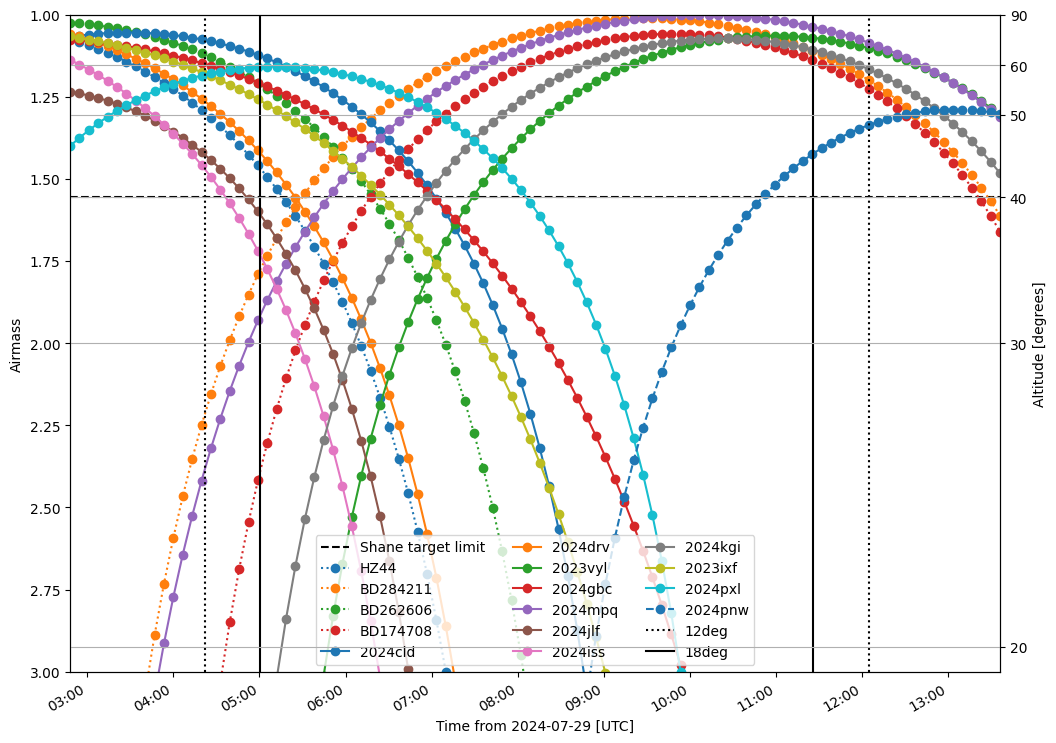

In [15]:
plt.close()
fig = plt.figure(figsize=(12,9))
fig.subplotpars.update(bottom=0.15)
ax = fig.add_subplot(111)
ax.axhline(1/np.cos(((90-40)*u.degree).to(u.radian)), color='k', ls='--', label='Shane target limit')
# ax.axhline(1/np.cos(((90-33)*u.degree).to(u.radian)), color='k', ls='--', label='Keck rising target lim')
#ax.axhline(1/np.cos(((90-38)*u.degree).to(u.radian)), color='k', ls='--', label='Keck rising target lim (new)')
time = today+np.linspace(-0.05, 0.4, 100)
for std in chosen_stds:
    plots.plot_airmass(std, observer, time, style_kwargs={'linestyle':':'})

for cycle, itarget in zip(custom_cycler,targets):
    plots.plot_airmass(itarget, observer, time, altitude_yaxis=True, ax=ax, style_kwargs=cycle)
ax.axvline(twi12deg.plot_date, linestyle=':', label='12deg', color='k')
ax.axvline(twi18deg.plot_date, color='k')
ax.axvline(pre_twi18deg.plot_date, label='18deg', color='k')
# ax.axvline(handoff.plot_date, label='handoff', color='k')
ax.axvline(pre_twi12deg.plot_date, color='k', ls=':')
#plt.axhline()
ax.legend(ncol=3, loc='lower center')

plt.grid()
plt.savefig('visibility.pdf')

In [16]:
sn2023ixf = astroplan.FixedTarget(coord=SkyCoord('14:03:38.56', '+54:18:42.0', unit=(u.hourangle, u.degree)),
                                   name='2023ixf')
sn2024gy  = astroplan.FixedTarget(coord=SkyCoord('12:15:51.31', '+13:06:56.1', unit=(u.hourangle, u.degree)),
                                   name='2024gy')
sn2024ws  = astroplan.FixedTarget(coord=SkyCoord('08:28:46.70', '+73:45:08.7', unit=(u.hourangle, u.degree)),
                                   name='2024ws')
sn2024bch = astroplan.FixedTarget(coord=SkyCoord('10:21:50.20', '+56:55:36.1', unit=(u.hourangle, u.degree)),
                                   name='2024bch')
sn2023wrk = astroplan.FixedTarget(coord=SkyCoord('11:28:39.17', '+58:33:12.7', unit=(u.hourangle, u.degree)),
                                   name='2023wrk')
sn2024apt = astroplan.FixedTarget(coord=SkyCoord('10:25:36.87', '-02:12:40.0', unit=(u.hourangle, u.degree)),
                                   name='2024apt')
sn2024drv = astroplan.FixedTarget(coord=SkyCoord('13:38:27.85', '+33:06:55.7', unit=(u.hourangle, u.degree)),
                                   name='2024drv')
sn2024byg = astroplan.FixedTarget(coord=SkyCoord('12:51:53.84', '-04:34:24.7', unit=(u.hourangle, u.degree)),
                                   name='2024byg')
sn2024cld = astroplan.FixedTarget(coord=SkyCoord('15:50:21.61', '+18:56:21.1', unit=(u.hourangle, u.degree)),
                                   name='2024cld')
sn2024cdi = astroplan.FixedTarget(coord=SkyCoord('08:27:08.00', '+22:50:27.8', unit=(u.hourangle, u.degree)),
                                   name='2024cdi')
sn2024btj = astroplan.FixedTarget(coord=SkyCoord('11:39:14.44', '+56:15:38.6', unit=(u.hourangle, u.degree)),
                                   name='2024btj')
sn2023ijd = astroplan.FixedTarget(coord=SkyCoord('12:36:32.48', '+11:13:19.7', unit=(u.hourangle, u.degree)),
                                   name='2023ijd')
sn2024iwi = astroplan.FixedTarget(coord=SkyCoord('14:35:19.086','+51:17:39.42',unit=(u.hourangle,u.degree)),name='2024iwi')


In [34]:
tab ="""BD262606    14:49:02.35 +25:42:09.1 9.7  1x135
HZ44        13:23:35.26 +36:07:59.5 11.7 1x240
2024iss     12:59:06.14 +28:48:42.5 15.6 2x900
2023ixf     14:03:38.56 +54:18:42.0 18.9 6x1200
2024pxl     17:32:27.35 +07:03:44.8 16.3 3x1200
2024mpq     22:30:41.08 +39:17:30.2 15.4 2x900
2024kgi     22:44:43.99 +16:05:07.0 16.5 3x1200
2024pnw     01:27:25.37 -01:54:52.7 15.6 2x900
BD284211    21:51:11.02 +28:51:50.4 10.7 1x180
BD174708    22:11:31.37 +18:05:34.2 9.2  1x135
end     00:00:00     -90:00:00.  99 1x1"""

# 2024jlf     14:37:42.32 +02:17:04.2 15.7 2x1200
# 2024drv     13:38:27.85 +33:06:55.7 18.5 5x1200
# 2024gbc     14:34:31.49 +58:18:33.0 18.7 5x1200
# 2024cld     15:50:21.61 +18:56:21.1 18   5x1200
# 2023vyl     23:20:29.66 +17:13:16.3 18.6 5x1200

# Blue standards from Foley group
# Feige34     10:39:36.74 +43:06:09.3 11.2 1x180
# BD284211    21:51:11.02 +28:51:50.4 10.7 1x180
# Feige110    23:19:58.00 -05:09:55.8 11.8 1x240
# G191B2B     05:05:30.62 +52:49:54.0 11.8 1x240
# HZ44        13:23:35.26 +36:07:59.5 11.7 1x240
# BD33d2642   15:51:59.86 +32:56:54.8 10.8 1x180

# Red standards from Foley group
# HD19445     03:08:25.86 +26:20:05.7 8.1 1x40
# HD84937     09:48:56.09 +13:44:39.3 8.3 1x60
# BD262606    14:49:02.35 +25:42:09.1 9.7  1x135
# BD174708    22:11:31.37 +18:05:34.2 9.2  1x135

In [35]:
row_list = tab.split('\n')
tbdata = Table(names=['name', 'ra', 'dec', 'mag', 'exposure'], dtype=('S10', 'S11', 'S11', 'S10', 'S10'))
for irow in row_list:
    tbdata.add_row(irow.split())
    
nexp = []
exptime = []
for irow in tbdata:
    inexp, iexptime = irow['exposure'].split('x')
    nexp.append(float(inexp))
    exptime.append(float(iexptime))
tbdata['nexp'] = nexp
tbdata['exptime'] = exptime

In [36]:
night_start = handoff
#night_start = Time(pre_twi15deg.iso)
readout_time = 195*u.second
slew = 300*u.second
obs_start = [night_start]
start_time = night_start
for irow in tbdata:
    start_time +=irow['exptime']*irow['nexp']*u.second+readout_time*(irow['nexp']-1) + slew
    obs_start.append(start_time)
    

In [37]:
tbdata['start'] = obs_start[:-1]

In [38]:
tbdata

name,ra,dec,mag,exposure,nexp,exptime,start
bytes10,bytes11,bytes11,bytes10,bytes10,float64,float64,Time
BD262606,14:49:02.35,+25:42:09.1,9.7,1x135,1.0,135.0,2024-07-29 04:35:00.000
HZ44,13:23:35.26,+36:07:59.5,11.7,1x240,1.0,240.0,2024-07-29 04:42:15.000
2024iss,12:59:06.14,+28:48:42.5,15.6,2x900,2.0,900.0,2024-07-29 04:51:15.000
2023ixf,14:03:38.56,+54:18:42.0,18.9,6x1200,6.0,1200.0,2024-07-29 05:29:30.000
2024pxl,17:32:27.35,+07:03:44.8,16.3,3x1200,3.0,1200.0,2024-07-29 07:50:45.000
2024mpq,22:30:41.08,+39:17:30.2,15.4,2x900,2.0,900.0,2024-07-29 09:02:15.000
2024kgi,22:44:43.99,+16:05:07.0,16.5,3x1200,3.0,1200.0,2024-07-29 09:40:30.000
2024pnw,01:27:25.37,-01:54:52.7,15.6,2x900,2.0,900.0,2024-07-29 10:52:00.000
BD284211,21:51:11.02,+28:51:50.4,10.7,1x180,1.0,180.0,2024-07-29 11:30:15.000


In [39]:
tbdata.write('../plan_20240616.txt', format='ascii.fixed_width', overwrite=True)

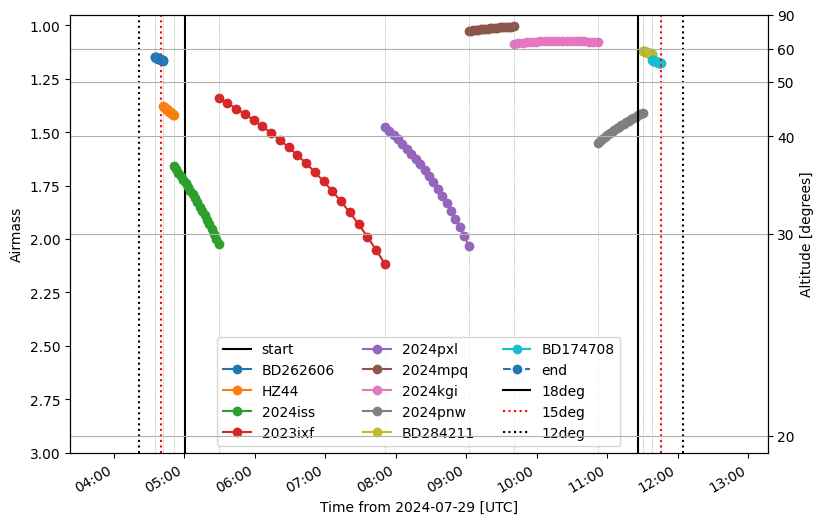

In [40]:
fig = plt.figure(figsize=(9,6))
fig.subplotpars.update(bottom=0.15)
ax = fig.add_subplot(111)
# ax.axhline(1/np.cos(((90-35)*u.degree).to(u.radian)), color='k', ls='--', label='Shane target lim')
#ax.axhline(1/np.cos(((90-38)*u.degree).to(u.radian)), color='r', ls='--', label='Keck rising target lim (new)')
#ax.axhline(1/np.cos(((90-18)*u.degree).to(u.radian)), color='k', ls='--', label='Keck rising target lim')
#time = today+np.linspace(0, 0.32, 100)
last_time = handoff
ax.axvline(pre_twi12deg.plot_date, color='k',  ls=':')
ax.axvline(pre_twi15deg.plot_date, color='red', ls=':')
ax.axvline(pre_twi18deg.plot_date, color='k',label='start')
for indx, cycle in enumerate(custom_cycler):
    try:
        irow = tbdata[indx]
    except IndexError:
        break
    itarget = astroplan.FixedTarget(coord=SkyCoord(ra=irow['ra'], dec=irow['dec'], unit=(u.hourangle, u.degree)), 
                                   name=irow['name'])
    try:
        time = irow['start'] + np.linspace(0,(tbdata[indx+1]['start']-irow['start']).value, 20)
    except IndexError:
        time = irow['start'] + np.linspace(0,(handoff-irow['start']).value, 20)
    plots.plot_airmass(itarget, observer, time, altitude_yaxis=True, ax=ax, style_kwargs=cycle)
ax.axvline(twi18deg.plot_date, label='18deg', color='k')
ax.axvline(twi15deg.plot_date, linestyle=':', label='15deg', color='red')
ax.axvline(twi12deg.plot_date, linestyle=':', label='12deg', color='k')
# ax.axvline(handoff.plot_date, label='handoff', color='k')
for start_time in tbdata['start']:
    ax.axvline(start_time.plot_date, color='gray', lw=0.5, ls=':')
ax.legend(ncol=3, loc='lower center')
#ax.set_xlim(pre_twi15deg.plot_date-0.05, handoff.plot_date+0.05)
ax.set_xlim(handoff.plot_date-0.05, twi12deg.plot_date+0.05)
ax.set_ylim(ymax=0.95)
plt.grid()
plt.savefig('schedule.pdf')

In [24]:
handoff

<Time object: scale='utc' format='iso' value=2024-07-29 04:35:00.000>

# Backup

In [25]:
tab = """MIRA 00:00:00 -89:00:00 99 2x600
2024jlf     14:37:42.32 +02:17:04.2 15.7 2x1200
2024ahv     16:18:46.32 +07:24:44.8 19.2 5x1200
2023vyl     23:20:29.66 +17:13:16.3 18.6 5x1200
end     00:00:00     -90:00:00.  99 1x1 """

# 2024drv     13:38:27.85 +33:06:55.7 18.5 5x1200
# 2024gbc     14:34:31.49 +58:18:33.0 18.7 5x1200
# 2024cld     15:50:21.61 +18:56:21.1 18   5x1200
# 2023wrk     11:28:39.17 +58:33:12.7 18.9 4x1200
# 2024iwi     14:35:19.09 +51:17:39.4 18   3x1200

In [26]:
row_list = tab.split('\n')
tbdata = Table(names=['name', 'ra', 'dec', 'mag', 'exposure'], dtype=('S10', 'S11', 'S11', 'S10', 'S10'))
for irow in row_list:
    tbdata.add_row(irow.split())

In [27]:
nexp = []
exptime = []
for irow in tbdata:
    inexp, iexptime = irow['exposure'].split('x')
    nexp.append(float(inexp))
    exptime.append(float(iexptime))
tbdata['nexp'] = nexp
tbdata['exptime'] = exptime

In [28]:
tbdata

name,ra,dec,mag,exposure,nexp,exptime
bytes10,bytes11,bytes11,bytes10,bytes10,float64,float64
MIRA,00:00:00,-89:00:00,99,2x600,2.0,600.0
2024jlf,14:37:42.32,+02:17:04.2,15.7,2x1200,2.0,1200.0
2024ahv,16:18:46.32,+07:24:44.8,19.2,5x1200,5.0,1200.0
2023vyl,23:20:29.66,+17:13:16.3,18.6,5x1200,5.0,1200.0
end,00:00:00,-90:00:00.,99,1x1,1.0,1.0


In [29]:
night_start = handoff
#night_start = Time(pre_twi15deg.iso)
readout_time = 195*u.second
slew = 300*u.second
obs_start = [night_start]
start_time = night_start
for irow in tbdata:
    start_time +=irow['exptime']*irow['nexp']*u.second+readout_time*(irow['nexp']-1) + slew
    obs_start.append(start_time)

In [30]:
tbdata['start'] = obs_start[:-1]

In [31]:
tbdata

name,ra,dec,mag,exposure,nexp,exptime,start
bytes10,bytes11,bytes11,bytes10,bytes10,float64,float64,Time
MIRA,00:00:00,-89:00:00,99,2x600,2.0,600.0,2024-07-29 04:35:00.000
2024jlf,14:37:42.32,+02:17:04.2,15.7,2x1200,2.0,1200.0,2024-07-29 05:03:15.000
2024ahv,16:18:46.32,+07:24:44.8,19.2,5x1200,5.0,1200.0,2024-07-29 05:51:30.000
2023vyl,23:20:29.66,+17:13:16.3,18.6,5x1200,5.0,1200.0,2024-07-29 07:49:30.000
end,00:00:00,-90:00:00.,99,1x1,1.0,1.0,2024-07-29 09:47:30.000


In [32]:
tbdata.write('../plan_backup.txt', format='ascii.fixed_width', overwrite=True)

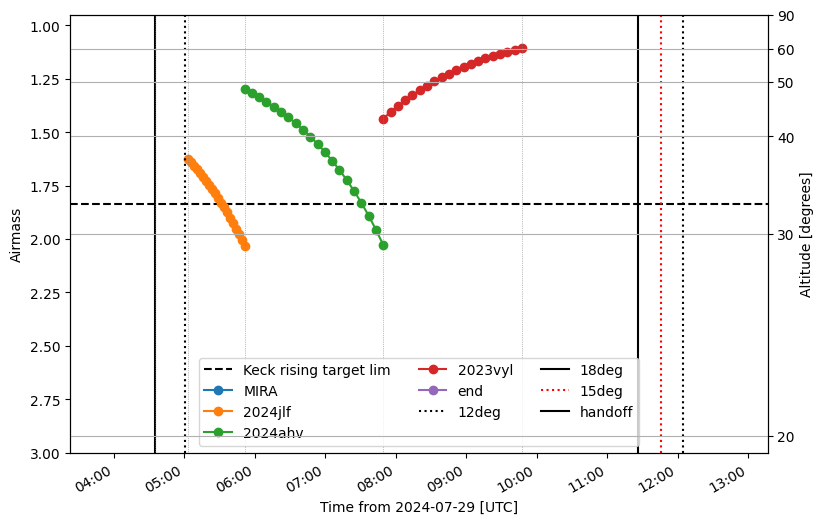

In [33]:
fig = plt.figure(figsize=(9,6))
fig.subplotpars.update(bottom=0.15)
ax = fig.add_subplot(111)
ax.axhline(1/np.cos(((90-33)*u.degree).to(u.radian)), color='k', ls='--', label='Keck rising target lim')
#ax.axhline(1/np.cos(((90-18)*u.degree).to(u.radian)), color='k', ls='--', label='Keck rising target lim')
#time = today+np.linspace(0, 0.32, 100)
last_time = handoff
for indx, cycle in enumerate(custom_cycler):
    try:
        irow = tbdata[indx]
    except IndexError:
        break
    itarget = astroplan.FixedTarget(coord=SkyCoord(ra=irow['ra'], dec=irow['dec'], unit=(u.hourangle, u.degree)), 
                                   name=irow['name'])
    try:
        time = irow['start'] + np.linspace(0,(tbdata[indx+1]['start']-irow['start']).value, 20)
    except IndexError:
        time = irow['start'] + np.linspace(0,(handoff-irow['start']).value, 20)
    plots.plot_airmass(itarget, observer, time, altitude_yaxis=True, ax=ax, style_kwargs=cycle)
ax.axvline(twi12deg.plot_date, linestyle=':', label='12deg', color='k')
ax.axvline(twi18deg.plot_date, label='18deg', color='k')
ax.axvline(twi15deg.plot_date, linestyle=':', label='15deg', color='red')
ax.axvline(handoff.plot_date, label='handoff', color='k')
ax.axvline(pre_twi18deg.plot_date, color='k', ls=':')
for start_time in tbdata['start']:
    ax.axvline(start_time.plot_date, color='gray', lw=0.5, ls=':')
ax.legend(ncol=3, loc='lower center')
#ax.set_xlim(pre_twi15deg.plot_date-0.05, handoff.plot_date+0.05)
ax.set_xlim(handoff.plot_date-0.05, twi12deg.plot_date+0.05)
ax.set_ylim(ymax=0.95)
plt.grid()
plt.savefig('schedule_backup.pdf')